This dataset is about the information regarding various countries.
It is an unlabelled dataset and hence we are going to implement clustering algorithm here
It is an unlabelled dataset and hence we are going to implement clustering algorithm here

 Start by importing all necessary modules

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
from sklearn.metrics import silhouette_score

2. Import dataset

In [26]:
data = pd.read_csv(r'C:\DataScience\project\Country-data.csv')
df=pd.DataFrame(data)
print(df.to_string())

                            country  child_mort  exports  health   imports  income  inflation  life_expec  total_fer    gdpp
0                       Afghanistan        90.2   10.000    7.58   44.9000    1610      9.440        56.2       5.82     553
1                           Albania        16.6   28.000    6.55   48.6000    9930      4.490        76.3       1.65    4090
2                           Algeria        27.3   38.400    4.17   31.4000   12900     16.100        76.5       2.89    4460
3                            Angola       119.0   62.300    2.85   42.9000    5900     22.400        60.1       6.16    3530
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   19100      1.440        76.8       2.13   12200
5                         Argentina        14.5   18.900    8.10   16.0000   18700     20.900        75.8       2.37   10300
6                           Armenia        18.1   20.800    4.40   45.3000    6700      7.770        73.3       1.69    3220



 3. Select features for x

In [27]:
x = df.iloc[:, 1:].values

 4. Finding optimal number of clusters using the elbow method

C:\Users\Abiram\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abiram\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abiram\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abiram\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

[117459687469.07816, 36528387934.3221, 21710210039.75414, 14610713446.535133, 10655378083.862543, 7655725089.094503, 5353767457.732321, 4258897193.751582, 3233569892.9812393, 2662158180.6633573]


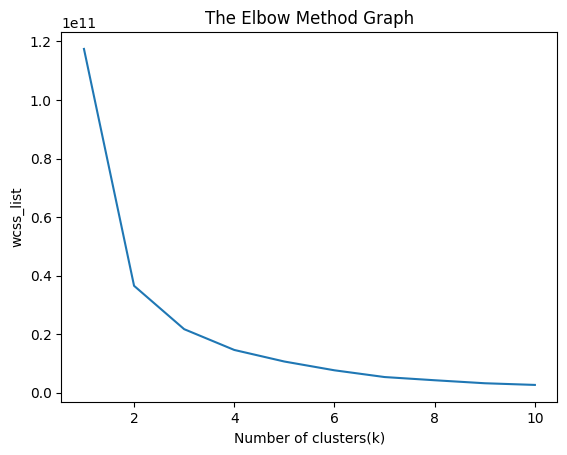

In [28]:
from sklearn.cluster import KMeans
wcss_list= []
#Initializing the list for the values of WCSS
#Using for loop for iterations from 1 to 10.

for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
   kmeans.fit(x)
   wcss_list.append(kmeans.inertia_)
print(wcss_list)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

 From the Elbow Method, we observed a sharp bent at the value 3, Hence we take K as 3.

 5. Training the K-means model on a dataset

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)
print(y_predict)

[1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2
 2 2 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 0 2 1 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 1 0 1 2 1 1 2 2 1 1 1 1 2 0 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1]


C:\Users\Abiram\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


To assess the clustering performance, we use a metric known as Silhouette Score

 6. Finding Silhouette score

In [30]:
print(silhouette_score(x, kmeans.fit_predict(x)))

0.7003508054481694


C:\Users\Abiram\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 We have observed that the silhouette score of this model is 0.72 which is considered to be strong and hence our clustering result is well defined.